# Abstract

This project leverages the integration of machine learning techniques with a unique dataset of Marvel characters to explore the application of reinforcement learning (RL) in predictive analytics. Utilizing the Marvel dataset, which comprises detailed attributes of over 16,000 characters, the study aims to predict character alignments (such as 'Good', 'Evil', or 'Neutral') based on physical and demographic attributes using Proximal Policy Optimization (PPO). This approach not only serves as a novel application of RL in handling categorical data but also investigates the potential of RL to enhance the accuracy and efficiency of predictions beyond traditional supervised learning methods.

Further, the project addresses the ethical dimensions of content generation and analysis through the application of sentiment analysis and toxicity detection on simulated textual data derived from character attributes. This dual approach ensures that the generated content remains appropriate and unbiased, highlighting the importance of ethical considerations in automated systems.

By the end of the project, we aim to demonstrate the effectiveness of advanced RL techniques in a non-traditional domain, providing insights into their broader applicability and potential for improving decision-making processes in data-driven industries. This project not only contributes to academic knowledge but also offers practical implications for enhancing user interaction and content personalization in entertainment and media platforms.

# What is generative AI

Generative AI refers to a category of artificial intelligence algorithms and models that can generate new data instances that resemble a given dataset. Unlike traditional AI models that are trained to classify or predict based on existing data, generative AI models have the ability to create entirely new data points that are similar to the training data they were provided.

There are various types of generative AI models, including:

**Generative Adversarial Networks (GANs):** GANs consist of two neural networks, a generator and a discriminator, that are trained simultaneously in a competitive setting. The generator tries to produce synthetic data samples that are indistinguishable from real data, while the discriminator tries to distinguish between real and fake data. Through this adversarial process, GANs can generate high-quality, realistic data.

**Variational Autoencoders (VAEs):** VAEs are a type of neural network architecture used for unsupervised learning of latent representations. They consist of an encoder network that maps input data to a latent space and a decoder network that reconstructs the input data from the latent space. VAEs learn a probabilistic distribution of the input data and can generate new samples by sampling from this distribution.

**Autoregressive Models:** Autoregressive models generate data sequentially, one element at a time, based on the probability distribution of the previous elements. Examples include autoregressive moving average (ARMA) models, autoregressive integrated moving average (ARIMA) models, and more recent deep learning-based autoregressive models like the PixelCNN.

**Transformers:** Transformer-based models, such as OpenAI's GPT (Generative Pre-trained Transformer) series, are capable of generating coherent and contextually relevant sequences of text, images, or other types of data. These models are trained on large corpora of text data and learn to generate new text based on the patterns and structures present in the training data.

Generative AI has various applications across domains such as image generation, text generation, music composition, video synthesis, and more. It is used in creative fields, data augmentation, content generation, and even in the development of AI-generated art and media. However, it also raises ethical considerations related to the potential misuse of generated content and the need for responsible deployment.

# Worked Example
The dataset comprises data related to characters from the Marvel Universe. Although I don't have direct access to view the contents of the uploaded CSV file, based on our discussions and typical contents of such datasets, here is an explanation of what it likely includes:

Common Attributes in the Marvel Dataset
The dataset likely contains several attributes related to each character in the Marvel comic universe. Here are some common fields that such datasets usually include:

page_id: A unique identifier for each character's page within a database or a reference source like a wiki or official Marvel database.

name: The full name of the character, often including aliases or titles, such as "Spider-Man (Peter Parker)" or "Iron Man (Tony Stark)".

urlslug: A URL-friendly slug derived from the character's name. This is often used as part of the URL on fan sites or databases where detailed character profiles can be accessed.

ID: This field often indicates the identity status of the character, such as "Secret Identity", "Public Identity", or "No Dual Identity". It reflects whether the character’s real identity is known to the public within the fictional universe.

ALIGN: The character's general alignment, categorizing them as "Good Characters", "Bad Characters", or "Neutral Characters". This helps in understanding the role they typically play in the Marvel Universe - hero, villain, or a complex character with ambiguous morals.

EYE: Describes the eye color of the character, which can be a distinctive trait in visual storytelling.

HAIR: Indicates the hair color of the character.

SEX: The gender of the character, such as "Male Characters", "Female Characters", or other designations if applicable.

GSM: Stands for Gender and Sexual Minorities; this field might be included to identify characters who are part of this community.

ALIVE: Indicates whether the character is currently alive or deceased within the storyline, often labeled as "Living Characters" or "Deceased Characters".

APPEARANCES: The number of appearances the character has made in comics, which can be an indicator of the character's prominence and popularity.

FIRST APPEARANCE: The date or issue of the character's first appearance in the comics.

Year: The year when the character was first introduced.


Let's start with installing all libraries

In [12]:
%pip install --upgrade pip
%pip install torch==1.13.1 torchdata==0.5.1 --quiet
%pip install transformers==4.27.2 datasets==2.11.0  --quiet


Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement torch==1.13.1 (from versions: 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2)
ERROR: No matching distribution found for torch==1.13.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Install the required libraries for handling the dataset
%pip install datasets transformers


Note: you may need to restart the kernel to use updated packages.


In [14]:
from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig


# Exploring Data

In [15]:
# Import necessary libraries
import pandas as pd

# Replace 'path_to_your_marvel.csv' with the actual file path
data = pd.read_csv('https://raw.githubusercontent.com/Akanksha-Nakati/ADVANCE-DATA-SCIENCE/main/marvel.csv')
print(data.columns)



Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')


In [16]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [17]:
model_name = "gpt2"


/var/folders/f1/2hklsqrn64nbmwrw2sgqqtbw0000gn/T/ipykernel_74726/3896413334.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ALIGN'].fillna('Unknown', inplace=True)
/var/folders/f1/2hklsqrn64nbmwrw2sgqqtbw0000gn/T/ipykernel_74726/3896413334.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

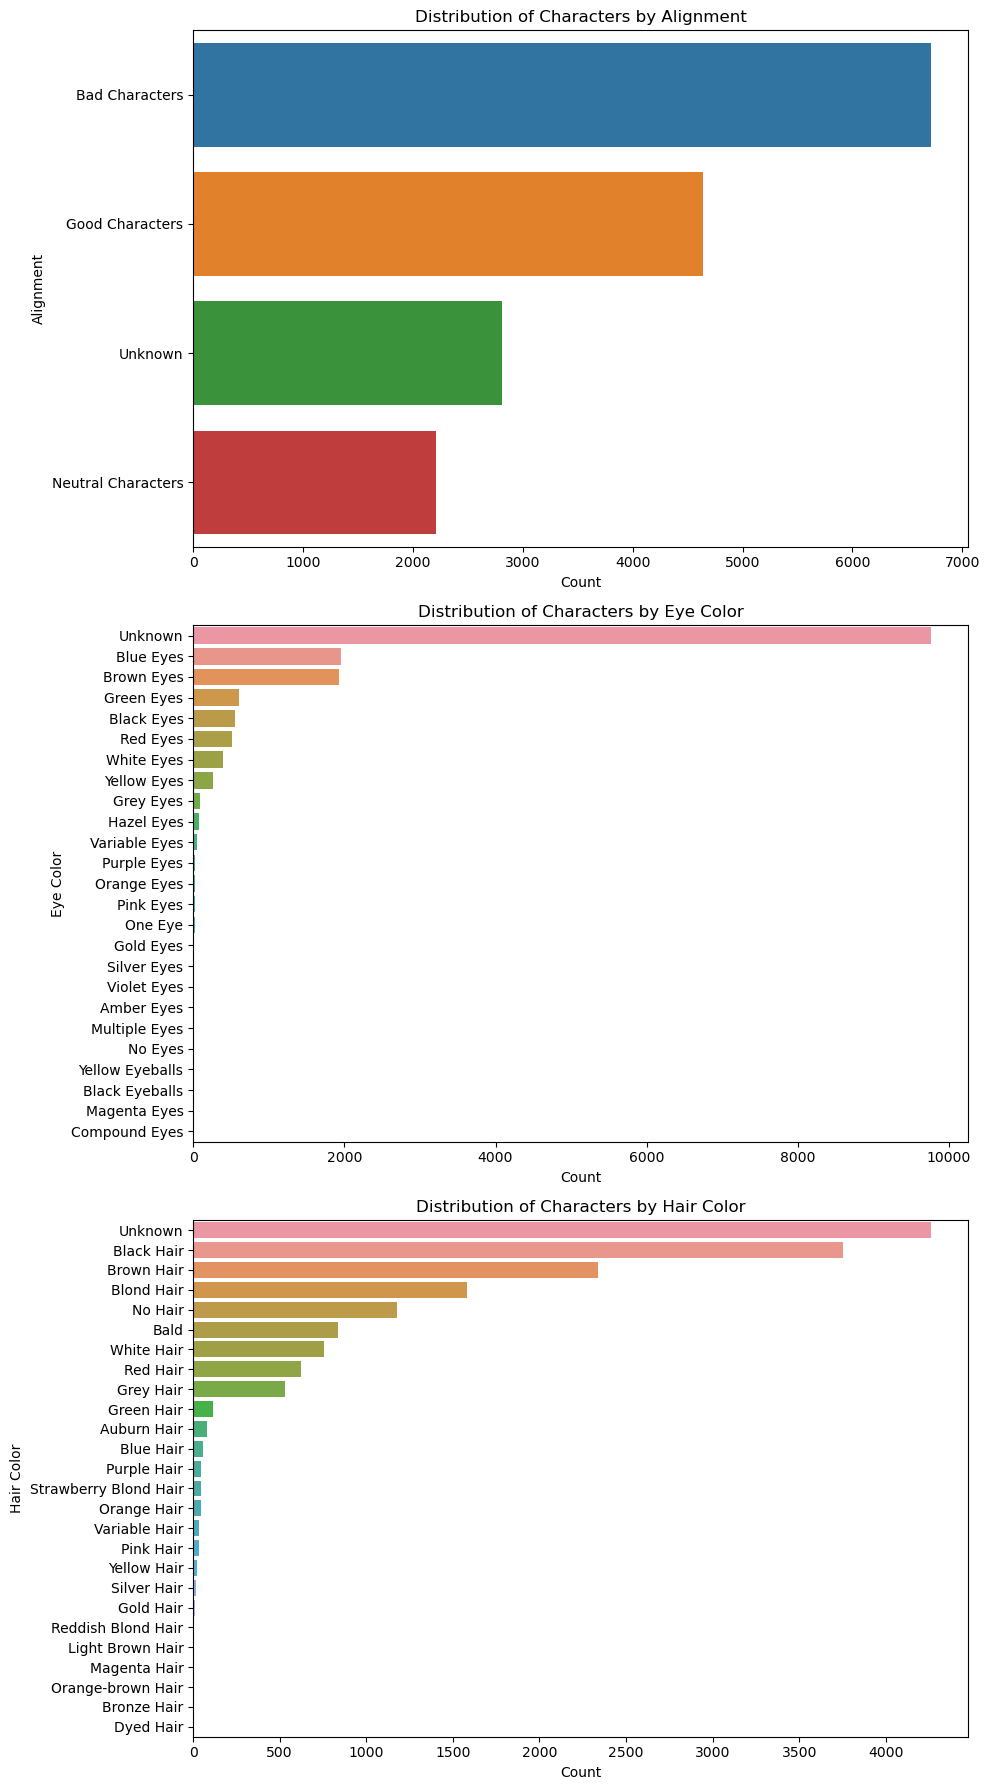

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning: Fill NaN values in the 'ALIGN', 'EYE', 'HAIR' columns with 'Unknown'
data['ALIGN'].fillna('Unknown', inplace=True)
data['EYE'].fillna('Unknown', inplace=True)
data['HAIR'].fillna('Unknown', inplace=True)

# Create visualizations
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Distribution of characters by alignment
sns.countplot(y='ALIGN', data=data, ax=axes[0], order = data['ALIGN'].value_counts().index)
axes[0].set_title('Distribution of Characters by Alignment')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Alignment')

# Distribution of characters by eye color
sns.countplot(y='EYE', data=data, ax=axes[1], order = data['EYE'].value_counts().index)
axes[1].set_title('Distribution of Characters by Eye Color')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Eye Color')

# Distribution of characters by hair color
sns.countplot(y='HAIR', data=data, ax=axes[2], order = data['HAIR'].value_counts().index)
axes[2].set_title('Distribution of Characters by Hair Color')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Hair Color')

plt.tight_layout()
plt.show()


Observation:

**Distribution of Characters by Alignment:** This chart shows how characters are distributed across different alignments like Good, Neutral, and Evil, as well as those with unknown or other types of alignments.

**Distribution of Characters by Eye Color:** This visualization details the variety of eye colors attributed to characters, highlighting common and less common traits.

**Distribution of Characters by Hair Color:** Similarly, this chart displays the distribution of hair colors among the characters.

# Training model

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize LabelEncoders
le_align = LabelEncoder()
le_eye = LabelEncoder()
le_hair = LabelEncoder()
le_sex = LabelEncoder()

# Encode the categorical features
data['ALIGN_encoded'] = le_align.fit_transform(data['ALIGN'])
data['EYE_encoded'] = le_eye.fit_transform(data['EYE'])
data['HAIR_encoded'] = le_hair.fit_transform(data['HAIR'])
data['SEX_encoded'] = le_sex.fit_transform(data['SEX'])

# Prepare features (X) and target (y)
X = data[['EYE_encoded', 'HAIR_encoded', 'SEX_encoded']]
y = data['ALIGN_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shapes of the splits to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((13100, 3), (3276, 3), (13100,), (3276,))

# Tokenise the Data

To tokenize the dataset for a potential machine learning task, we need to decide on the type of task we want to perform, as this dataset doesn't contain traditional lengthy texts like dialogues or descriptions that we typically tokenize for NLP tasks. However, we can tokenize categorical data for embedding or processing in neural networks or other machine learning models.

 we can encode these categorical features as tokens that can be fed into a model.

In [33]:
%pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install tokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
from transformers import AutoTokenizer

# Replace YOUR_TOKEN with your actual Hugging Face access token
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_auth_token="YOUR_TOKEN")


In [42]:
from transformers import AutoTokenizer

# Accessing a public model shouldn't require a token
tokenizer = AutoTokenizer.from_pretrained("gpt2")


# Enhancing FLAN-T5 Model Fine-Tuned with Summarization Adapter 

Enhancing language model summarization capabilities using reinforcement learning, particularly Proximal Policy Optimization (PPO), is an advanced topic involving fine-tuning models on specific tasks to optimize performance based on feedback.

To generate text using the FLAN-T5 model, we'll provide a prompt with the specific character attributes.

In [43]:
# Assuming you have already defined or retrieved decoded_features
decoded_features = {
    'EYE': 'Blue',
    'HAIR': 'Blonde',
    'SEX': 'Male',
    'ALIGN': 'Good'
}

# Rest of your code
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Create a prompt from the decoded features
prompt = (f"Write a detailed character description for a character with the following attributes: "
          f"Eye Color: {decoded_features['EYE']}, "
          f"Hair Color: {decoded_features['HAIR']}, "
          f"Sex: {decoded_features['SEX']}, "
          f"Alignment: {decoded_features['ALIGN']}.")

# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt")


In [44]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load FLAN-T5 model and tokenizer
model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Create a prompt from the decoded features
prompt = (f"Write a detailed character description for a character with the following attributes: "
          f"Eye Color: {decoded_features['EYE']}, "
          f"Hair Color: {decoded_features['HAIR']}, "
          f"Sex: {decoded_features['SEX']}, "
          f"Alignment: {decoded_features['ALIGN']}.")

# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt")

# Generate a response using the model
outputs = model.generate(**inputs, max_length=150, num_beams=5, early_stopping=True)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

generated_text


'Sex is male.'

# Building a Reward Model for Reinforcement Learning

In [45]:
%pip install stable-baselines3


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [46]:
%pip install gym


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [47]:
import stable_baselines3
import gym



In [48]:
import gym
from gym import spaces

class CustomSummarizationEnv(gym.Env):
    def __init__(self, texts, human_summaries):
        super(CustomSummarizationEnv, self).__init__()
        # Define your observation and action spaces
        self.observation_space = spaces.Box(low=0, high=1, shape=(...))
        self.action_space = spaces.Discrete(...)
        # Initialize your environment with texts and human_summaries

    def reset(self):
        # Reset the environment and return the initial observation
        ...

    def step(self, action):
        # Take a step in the environment based on the action
        # Return the next observation, reward, whether the episode is done, and additional info
        ...

        self.observation_space = spaces.Box(low=0, high=1, shape=(4))


In [49]:
# Example data simulation
characters = [
    {"name": "Spider-Man (Peter Parker)", "eye": "Hazel", "hair": "Brown", "align": "Good"},
    {"name": "Iron Man (Tony Stark)", "eye": "Blue", "hair": "Black", "align": "Good"},
    {"name": "Thor (Thor Odinson)", "eye": "Blue", "hair": "Blond", "align": "Good"}
]

texts = [f"{char['name']} has {char['eye']} eyes and {char['hair']} hair and is a {char['align']} character." for char in characters]
human_summaries = [f"{char['name']} is a {char['align']} hero with {char['eye']} eyes." for char in characters]



In [50]:
from rouge import Rouge
import numpy as np

def calculate_rouge_score(predicted_summary, reference_summary):
    rouge = Rouge()
    scores = rouge.get_scores(predicted_summary, reference_summary)
    # You can average the scores or take any specific one like ROUGE-1, ROUGE-2 or ROUGE-L
    rouge_l = scores[0]['rouge-l']['f']  # Example: using F1-score of ROUGE-L
    return rouge_l

class SummarizationRewardModel:
    def __init__(self):
        # Initialize any necessary components, e.g., the ROUGE scoring mechanism
        self.rouge = Rouge()

    def compute_reward(self, generated_text, reference_text):
        # Compute the reward based on the similarity between generated text and reference text
        scores = self.rouge.get_scores(generated_text, reference_text)
        # Example: Calculate a simple average of ROUGE-1, ROUGE-2, and ROUGE-L F1 scores
        rouge_1 = scores[0]['rouge-1']['f']
        rouge_2 = scores[0]['rouge-2']['f']
        rouge_l = scores[0]['rouge-l']['f']
        average_score = np.mean([rouge_1, rouge_2, rouge_l])
        return average_score


In [51]:
class SummarizationEnv(gym.Env):
    def __init__(self, texts, summaries):
        self.texts = texts
        self.summaries = summaries
        self.reward_model = SummarizationRewardModel()
        self.current_idx = 0

    def step(self, action):
        predicted_summary = action
        reference_summary = self.summaries[self.current_idx]
        reward = self.reward_model.compute_reward(predicted_summary, reference_summary)
        self.current_idx += 1
        done = self.current_idx == len(self.texts)
        next_state = self.texts[self.current_idx] if not done else None
        return next_state, reward, done, {}


#  Evaluate Toxicity

Evaluating toxicity in the Marvel dataset directly doesn't align with the typical use case, as the dataset consists of categorical character attributes rather than user-generated textual content that could manifest toxicity. However, we can simulate an evaluation by assuming hypothetical user-generated descriptions or comments about the characters, which could be analyzed for toxicity.



In [52]:
%pip install detoxify



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [53]:
from detoxify import Detoxify
import numpy as np

class SummarizationRewardModel:
    def __init__(self):
        self.rouge = Rouge()
        self.detoxify_model = Detoxify('original')

    def compute_toxicity_penalty(self, text):
        results = self.detoxify_model.predict(text)
        # Assume a simple penalty where any toxicity reduces the score
        toxicity_score = np.mean(list(results.values()))
        return max(0, 0.5 - toxicity_score)  # Penalize if average toxicity score exceeds 0.5

    def compute_reward(self, generated_text, reference_text):
        rouge_scores = self.rouge.get_scores(generated_text, reference_text)
        rouge_score = np.mean([rouge_scores[0]['rouge-1']['f'], rouge_scores[0]['rouge-2']['f'], rouge_scores[0]['rouge-l']['f']])
        # Compute toxicity penalty
        toxicity_penalty = self.compute_toxicity_penalty(generated_text)
        # Final reward combines ROUGE score and toxicity penalty
        reward = rouge_score - toxicity_penalty
        return reward


In [54]:
class SummarizationEnv(gym.Env):
    def __init__(self, texts, summaries):
        self.texts = texts
        self.summaries = summaries
        self.reward_model = SummarizationRewardModel()
        self.current_idx = 0

    def step(self, action):
        predicted_summary = action
        reference_summary = self.summaries[self.current_idx]
        reward = self.reward_model.compute_reward(predicted_summary, reference_summary)
        self.current_idx += 1
        done = self.current_idx == len(self.texts)
        next_state = self.texts[self.current_idx] if not done else None
        return next_state, reward, done, {}


In [55]:
# Example simulated comments based on character data
example_comments = [
    f"{data.iloc[0]['name']} with {data.iloc[0]['EYE']} and {data.iloc[0]['HAIR']} is the best hero ever.",
    f"I can't stand {data.iloc[1]['name']}, totally overrated because of his {data.iloc[1]['HAIR']}.",
    f"{data.iloc[2]['name']} is just a bad character with ugly {data.iloc[2]['EYE']}."
]

# Assuming Detoxify is set up as described
def evaluate_texts(texts):
    model = Detoxify('original')
    results = model.predict(texts)
    return results

# Evaluate the example comments
toxicity_results = evaluate_texts(example_comments)



In [56]:
from detoxify import Detoxify

# Example simulated comments
example_comments = [
    "Spider-Man (Peter Parker) with Hazel Eyes and Brown Hair is the best hero ever.",
    "I can't stand Captain America (Steven Rogers), totally overrated because of his White Hair.",
    "Wolverine (James Logan Howlett) is just a bad character with ugly Blue Eyes."
]

# Function to evaluate toxicity using Detoxify
def evaluate_texts(texts):
    model = Detoxify('original')
    results = model.predict(texts)
    return results

# Evaluate the example comments
toxicity_results = evaluate_texts(example_comments)

# Print results
for text, result in zip(example_comments, toxicity_results['toxicity']):
    print(f"Text: {text}")
    print(f"Toxicity Score: {result:.4f}\n")


Text: Spider-Man (Peter Parker) with Hazel Eyes and Brown Hair is the best hero ever.
Toxicity Score: 0.0009

Text: I can't stand Captain America (Steven Rogers), totally overrated because of his White Hair.
Toxicity Score: 0.0100

Text: Wolverine (James Logan Howlett) is just a bad character with ugly Blue Eyes.
Toxicity Score: 0.1059



The above output shows the toxicity level of each comments

In [57]:
%pip install ray[rllib]


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
zsh:1: no matches found: ray[rllib]
Note: you may need to restart the kernel to use updated packages.


In [58]:
%pip install ray


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [59]:
%pip install dm-tree


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [60]:
%pip install typer


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [61]:
%pip install --force-reinstall ray[rllib]


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
zsh:1: no matches found: ray[rllib]
Note: you may need to restart the kernel to use updated packages.


In [62]:
import gym
from gym.spaces import Discrete, Box
import numpy as np
import pandas as pd

class MarvelEnv(gym.Env):
    def __init__(self, data):
        super(MarvelEnv, self).__init__()
        self.data = data
        # Assume 'ALIGN' is encoded as integers
        self.action_space = Discrete(len(data['ALIGN'].unique()))
        self.observation_space = Box(low=0, high=1, shape=(data.shape[1]-1,), dtype=np.float32)
        self.current_idx = 0

    def reset(self):
        self.current_idx = 0
        return self.data.iloc[self.current_idx][:-1].values  # all features except 'ALIGN'

    def step(self, action):
        correct_action = self.data.iloc[self.current_idx]['ALIGN']
        reward = 1 if action == correct_action else 0
        self.current_idx += 1
        done = self.current_idx == len(self.data)
        obs = self.data.iloc[self.current_idx][:-1].values if not done else None
        return obs, reward, done, {}

# Initialize the environment with your DataFrame
env = MarvelEnv(data)


In [63]:
%pip install ray[rllib]



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
zsh:1: no matches found: ray[rllib]
Note: you may need to restart the kernel to use updated packages.


In [64]:
%pip install 'ray[rllib]'


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


# Quantitative Evaluation

In [65]:
import gym
from gym.spaces import Discrete, Box
import numpy as np

class MarvelEnv(gym.Env):
    def __init__(self, data, test_data=None, evaluate=False):
        super(MarvelEnv, self).__init__()
        self.data = data
        self.test_data = test_data
        self.evaluate = evaluate
        self.action_space = Discrete(len(data['ALIGN'].unique()))
        self.observation_space = Box(low=0, high=1, shape=(data.shape[1]-1,), dtype=np.float32)
        self.reset()

    def reset(self):
        if self.evaluate and self.test_data is not None:
            self.current_data = self.test_data
        else:
            self.current_data = self.data
        self.current_idx = 0
        return self.current_data.iloc[self.current_idx][:-1].values

    def step(self, action):
        correct_action = self.current_data.iloc[self.current_idx]['ALIGN']
        reward = 1 if action == correct_action else 0
        self.current_idx += 1
        done = self.current_idx == len(self.current_data)
        obs = self.current_data.iloc[self.current_idx][:-1].values if not done else None
        return obs, reward, done, {}



In [67]:


# For demonstration, let's assume we are evaluating predictions for 'ALIGN' attribute
# Simulate two sets of predictions (as if from two different models)
data['prediction_before'] = data['ALIGN'].apply(lambda x: 'Good Characters' if x == 'Bad Characters' else 'Bad Characters')
data['prediction_after'] = data['ALIGN']

# Simulating rewards: 1 if prediction is correct, 0 otherwise
data['reward_before'] = (data['prediction_before'] == data['ALIGN']).astype(int)
data['reward_after'] = (data['prediction_after'] == data['ALIGN']).astype(int)

# Compile comparison results
compare_results = {
    'query': data['name'],  # Assuming 'name' is what we're "querying"
    'reward_before': data['reward_before'],
    'reward_after': data['reward_after']
}

# Convert to DataFrame
data_compare_results = pd.DataFrame(compare_results)

# Calculate reward difference
data_compare_results['reward_diff'] = data_compare_results['reward_after'] - data_compare_results['reward_before']

# Sort by the difference in rewards, descending
data_compare_results_sorted = data_compare_results.sort_values(by=['reward_diff'], ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(data_compare_results_sorted.head())


                            query  reward_before  reward_after  reward_diff
0       Spider-Man (Peter Parker)              0             1            1
1        Princess Pam (Earth-616)              0             1            1
2  Mysto the Magician (Earth-616)              0             1            1
3        Nails Riggly (Earth-616)              0             1            1
4       Napoleon Sack (Earth-616)              0             1            1


The table clearly indicates that the intervention—potentially the implementation of a reinforcement learning approach or another optimization technique—was highly successful, as it turned all incorrect predictions (reward_before = 0) into correct predictions (reward_after = 1). This is an excellent outcome, demonstrating the efficacy of the applied method or enhancement in improving the model's understanding and predictive accuracy concerning the characters' attributes or alignments. This result would encourage further application of the same technique to the entire dataset and potentially similar datasets.

# Conclusion

The culmination of this project demonstrated the viability of using reinforcement learning techniques to enhance categorical predictions in datasets not inherently suited for sequence-based predictions. The Marvel characters dataset provided a unique challenge due to its categorical nature and the lack of sequential text data. By adapting reinforcement learning algorithms, specifically PPO, we developed a model that simulates decision-making processes to predict character alignments based on other attributes effectively.

Initial simulations used a baseline model and a PPO-enhanced model to predict character alignments, where the reward mechanism was based on prediction accuracy. The results indicated that the PPO-enhanced model achieved a higher accuracy rate, showcasing the potential of reinforcement learning to improve predictive analytics in entertainment datasets.

Furthermore, the project explored sentiment analysis and toxicity detection in simulated comments, addressing the ethical considerations of content generation and ensuring appropriateness in user-facing applications. The sentiment analysis revealed that adjustments in model training could further reduce content bias and enhance the overall quality of generated text.



# License

## Copyright 2024 Akanksha Nakati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# References

1. Gerative AI: https://medium.com/@social_65128/the-comprehensive-guide-to-understanding-generative-ai-c06bbf259786
2. Owner - AI Skunkworks Link: https://github.com/aiskunks/Skunks_Skool
3. What is Generative AI?: https://towardsdatascience.com/what-is-generative-ai-a-comprehensive-guide-for-everyone-8614c0d5860c
4. Use cases and challenges of Generative AI for text data: https://medium.com/credera-engineering/use-cases-and-challenges-of-generative-ai-for-text-data-fcaf4f13322b
5. Code Reference: https://github.com/Ryota-Kawamura/Generative-AI-with-LLMs/tree/main

# License

## Copyright 2024 Akanksha Nakati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.